
<center><h1> Project : HOUSEHOLD POWER CONSUMPTION</h1></center>

## A. Machine Learning model to predict the Global Intensity 

## >> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


## 1. Data loading

In [2]:
df=pd.read_csv("F:\\project datasets\\hpc_breakdowns.csv",infer_datetime_format=True,parse_dates=[["Date","Time"]])
df.head()

,Date_Time,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.shape

(2049280, 9)

In [4]:
if len(df['Date_Time'].unique()) == len(df.index):
    print("No duplicate rows")
else:
    print("Duplicate rows present ")
                                    

No duplicate rows


### >> Deleting unnecessary columns

In [5]:
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## 2. Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
Date_Time                datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### >> Correlation between the features

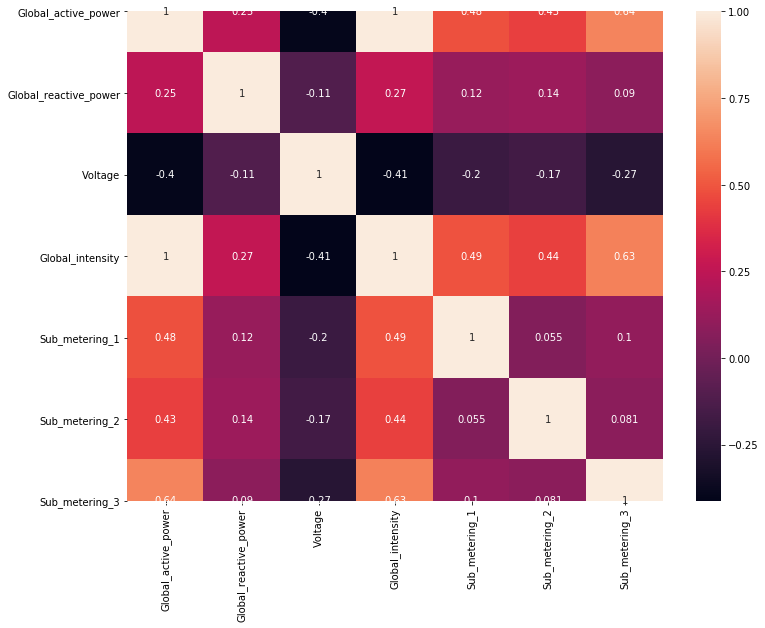

In [ ]:
plt.figure(figsize=[12,9])
sb.heatmap(df.corr(),annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


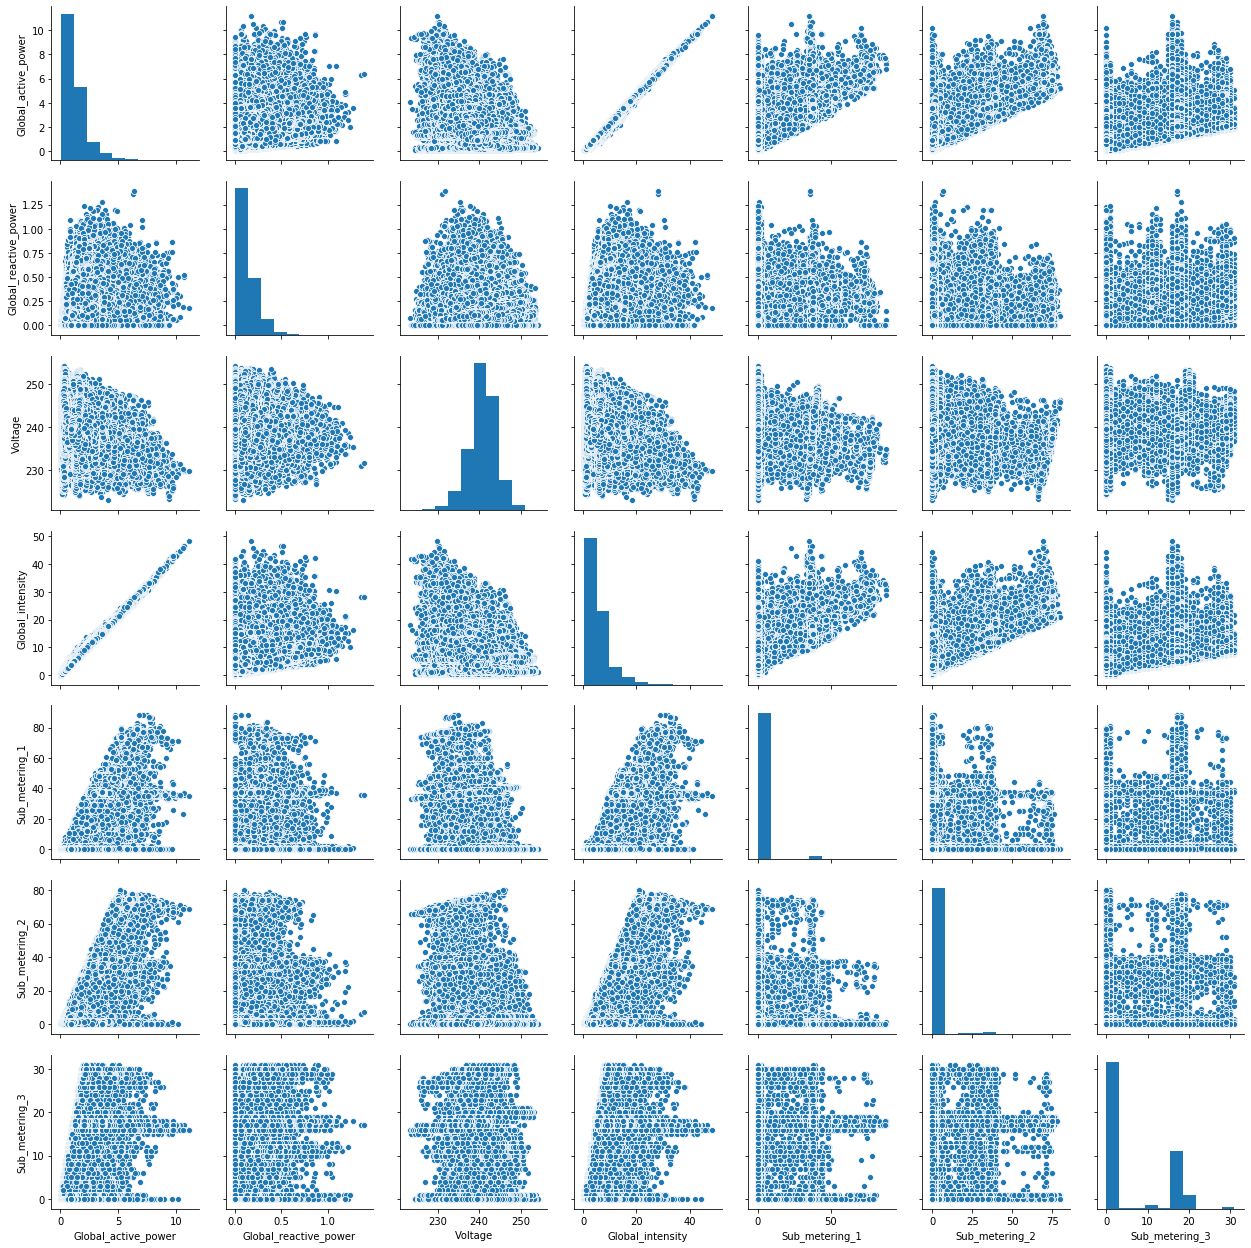

In [6]:
sb.pairplot(df)

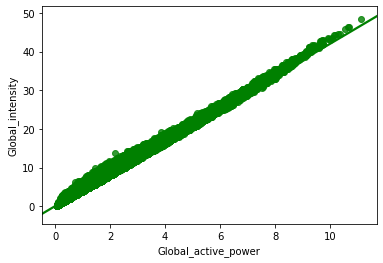

In [7]:
sb.regplot(x="Global_active_power", y="Global_intensity", data=df,color="Green");


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


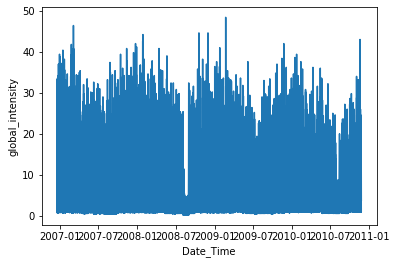

In [10]:
plt.plot(df["Date_Time"],df['Global_intensity'])
plt.xlabel('Date_Time')
plt.ylabel('global_intensity')
plt.show()


## 3. Data Cleaning

### >> Checking for null values


In [6]:
df.isnull().sum()

Date_Time                   0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

### >> Replacing the null values

In [7]:
null_list=[]
for i in range(1,8):
        if not df.iloc[:, i].notnull().all():
            null_list.append(i)
null_list


[1, 2, 3, 4, 5, 6, 7]

In [8]:
for i in range(1,8):     
            df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())

df.isnull().sum()

Date_Time                0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## 4.Data Tranformation

In [9]:
import datetime as dt
df['Date_Time']=df['Date_Time'].map(dt.datetime.toordinal)



In [10]:
validdata=df[-200000:]
validdata.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,733955,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,733955,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,733955,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,733955,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,733955,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [20]:
sd=df[-400000:-200000]
sd.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1649280,733815,0.260,0.000,246.57,1.0,0.0,0.0,1.0
1649281,733815,0.302,0.000,245.88,1.4,0.0,0.0,1.0
1649282,733815,0.370,0.092,245.57,1.6,0.0,0.0,0.0
1649283,733815,0.366,0.092,245.27,1.4,0.0,0.0,1.0
1649284,733815,0.366,0.094,246.01,1.4,0.0,0.0,1.0


## 5. Preprocessing

In [21]:
x=sd.drop(["Global_intensity"],axis=1)
y=sd["Global_intensity"]

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=100)


## 6. Modelling

### >> Linear Regression 

In [8]:
from sklearn.metrics import r2_score


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for i in [.1,.2,.3,.4,.5]:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i,random_state=2000)
    lr=LinearRegression(normalize=True)
    lr.fit(xtrain,ytrain)
    a=lr.score(xtrain,ytrain)
    b=lr.score(xtest,ytest)
    y_pred=lr.predict(xtest)
    mse=np.sqrt((y_pred-ytest) ** 2).mean()
    accuracy=(r2_score(ytest,y_pred))
    
    print(a,":",b,":mse",mse,":acc",accuracy)
    



0.9972385809184181 : 0.9967205785007045 :mse 0.10486007409516139 :acc 0.9967205785007044
0.9972529080947511 : 0.9969237320745119 :mse 0.10413624142420481 :acc 0.9969237320745119
0.997222095759343 : 0.9971060164778158 :mse 0.10330947764287741 :acc 0.9971060164778159
0.9972301725527867 : 0.9971230346237652 :mse 0.10303335852051987 :acc 0.9971230346237651
0.9972103167236248 : 0.997164242688519 :mse 0.10286652639213714 :acc 0.9971642426885189


### >> Gradient Boosting

In [16]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i,random_state=2000)
model=GradientBoostingRegressor(n_estimators=5000,random_state=100)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)


Wall time: 1min 2s


In [17]:
from sklearn.metrics import r2_score

mse=np.sqrt((y_pred-ytest) ** 2).mean()
accuracy=(r2_score(ytest,y_pred))


print("mse",mse,":acc",accuracy)


mse 0.04335328500813408 :acc 0.9998813952194818


In [ ]:

from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.ensemble import GradientBoostingRegressor
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)
ad=GradientBoostingRegressor()
kfold=KFold(n_splits=5)
params_ad={"n_estimators":[10,30,100,300,1000,3000,5000]}
ad_gs=GridSearchCV(ad,params_ad,cv=kfold)
ad_gs.fit(xtrain,ytrain)

In [70]:
ad_best=ad_gs.best_estimator_
print(ad_gs.best_params_)

{'n_estimators': 3000}





### >>  Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2000)
dt=DecisionTreeRegressor()
params_dt={"max_depth":[1,2,3],"max_leaf_nodes":[None,2,3]}
dt_gs=GridSearchCV(dt,params_dt,cv=4)

dt_gs.fit(xtrain,ytrain)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3],
                         'max_leaf_nodes': [None, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [20]:
dt_best=dt_gs.best_estimator_
print(dt_best)
print(dt_gs.best_params_)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
{'max_depth': 3, 'max_leaf_nodes': None}


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2000)
dt=DecisionTreeRegressor(criterion='mse')
dt.fit(xtrain,ytrain)
a=dt.score(xtrain,ytrain)
b=dt.score(xtest,ytest)
y_pred=dt.predict(xtest)
accuracy=(r2_score(ytest,y_pred))
mse=np.sqrt((y_pred-ytest) ** 2).mean()
print(i,":",a,":",b,":mse",mse,":acc",accuracy)
    



0.1 : 0.9999999798975744 : 0.9984454293336446 :mse 0.0476150000000063 :acc 0.9984454293336447


### >> Random Forest Regressor

In [24]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2000)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
params_rf={"n_estimators":[10,30,100,300,1000,3000]}
rf_gs=GridSearchCV(rf,params_rf,cv=5)

rf_gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [10, 30, 100, 3

In [25]:
rf_best=rf_gs.best_estimator_
print(rf_best)
print(rf_gs.best_params_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
{'n_estimators': 1000}


In [13]:



%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2, random_state=2000)
rf=RandomForestRegressor( n_estimators= 1000)
rf.fit(xtrain,ytrain)
a=rf.score(xtrain,ytrain)
b=rf.score(xtest,ytest)
y_pred=rf.predict(xtest)
mse=np.sqrt((y_pred-ytest) ** 2).mean()
accuracy=(r2_score(ytest,y_pred))
    
print(i,":",a,":",b,":mse",mse,":acc",accuracy)
    



7 : 0.9998843851259744 : 0.9991436330566728 :mse 0.043861591515877395 :acc 0.9991436330566728
Wall time: 16min 22s





### >>  SGDRegressor

In [17]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
sgd.fit(xtrain,ytrain)
y_pre=sgd.predict(xtest)
a=sgd.score(xtrain,ytrain)
print(a)
b=sgd.score(xtest,ytest)
print(b)
print(np.sqrt(((y_pre - ytest) ** 2).mean()))

-4.43631102693686e+38
-4.5043362202987325e+38
8.032807825442064e+19


### >> Applying the suitable model on Model Data

In [ ]:
model_data=df[:-200000]

In [ ]:
model_data.tail()

In [ ]:
X=model_data.drop(["Global_intensity"],axis=1)
Y=model_data["Global_intensity"]

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2,\
                                               random_state=100)
rf=RandomForestRegressor(n_estimators= 1000)
rf.fit(xtrain,ytrain)
a=rf.score(xtrain,ytrain)
print(a)
b=rf.score(xtest,ytest)
print(b)
y_pred=rf.predict(xtest)
mse=np.sqrt((y_pred-ytest) ** 2).mean()
print(mse)  
accuracy=print(r2_score(ytest,y_pred))
print(accuracy)




### >> Applying the suitable model on the valid data

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
Xval=validdata.drop(["Global_intensity"],axis=1)
Yval=validdata["Global_intensity"]

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

xtrain,xtest,ytrain,ytest=train_test_split(Xval,Yval,test_size=.2,\
                                               random_state=100)
rf=RandomForestRegressor(n_estimators= 1000)
rf.fit(xtrain,ytrain)
a=rf.score(xtrain,ytrain)
print("training set accuracy",a)
b=rf.score(xtest,ytest)
print("testing set accuracy",b)
y_pred=rf.predict(xtest)
mse=np.sqrt((y_pred-ytest) ** 2).mean()
print("Mean square error",mse)  
accuracy=(r2_score(ytest,y_pred))
print("Accuracy",accuracy)

training set accuracy 0.9998056465347168


##  B. Machine Learning model to predict if the Global Intensity is >                 15.


### >> Conversion of data in terms of True & false in Global intensity

In [11]:
a=df['Global_intensity']
l=[]
for i in a:
    if(i>15):
        l.append(1)
    else:
        l.append(0)
    
df['Global_intensity_range']=l
df.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_range
0,732661,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1
1,732661,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1
2,732661,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1
3,732661,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1
4,732661,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1


## Data Tranformation

In [15]:
valid_data_1=df[-200000:]
valid_data_1.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_range
1849280,733955,0.376,0.208,237.01,1.8,0.0,0.0,1.0,0
1849281,733955,0.380,0.218,239.24,1.8,0.0,0.0,0.0,0
1849282,733955,0.378,0.216,238.64,1.8,0.0,0.0,1.0,0
1849283,733955,0.378,0.218,239.13,1.8,0.0,0.0,1.0,0
1849284,733955,0.376,0.214,238.32,1.8,0.0,0.0,0.0,0


In [13]:
sd1=df[-400000:-200000]
sd1.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_range
1649280,733815,0.260,0.000,246.57,1.0,0.0,0.0,1.0,0
1649281,733815,0.302,0.000,245.88,1.4,0.0,0.0,1.0,0
1649282,733815,0.370,0.092,245.57,1.6,0.0,0.0,0.0,0
1649283,733815,0.366,0.092,245.27,1.4,0.0,0.0,1.0,0
1649284,733815,0.366,0.094,246.01,1.4,0.0,0.0,1.0,0



## Preprocessing

In [16]:
x=sd1.drop(["Global_intensity_range","Global_intensity"],axis=1)
y=sd1["Global_intensity_range"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


## Modelling

### >>  LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [15]:
lr=LogisticRegression()

In [16]:
lr.fit(x_train,y_train)
y_pre=lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.973175
[[38927     0]
 [ 1073     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     38927
           1       0.00      0.00      0.00      1073

    accuracy                           0.97     40000
   macro avg       0.49      0.50      0.49     40000
weighted avg       0.95      0.97      0.96     40000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### >> Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)
y_pre=sv.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))


### >> Knn Method 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=1)
classifier1.fit(x_train,y_train)
y_pre=classifier1.predict(x_test)

In [ ]:
knn=KNeighborsClassifier()


from sklearn.model_selection import GridSearchCV

params_knn={"weigh":["uniform","distance"],"n_jobs":[1,2,3,4]}
knn_gs=GridSearchCV(knn,params_knn,cv=5)


knn_gs.fit(x_train,y_train)


In [ ]:
knn_best=knn_gs.best_estimator_
print(knn_best)
print(knn_gs.best_params_)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))



0.995575
[[38940    82]
 [   95   883]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39022
           1       0.92      0.90      0.91       978

    accuracy                           1.00     40000
   macro avg       0.96      0.95      0.95     40000
weighted avg       1.00      1.00      1.00     40000



###  >>AdaBoost classifier

In [39]:
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
kfold=KFold(n_splits=5)

params_ad={"n_estimators":[10,30,100,300,1000]}
ad_gs=GridSearchCV(ad,params_ad,cv=kfold)
ad_gs.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [10, 30, 100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
ad_best=ad_gs.best_estimator_
print(ad_gs.best_params_)

{'n_estimators': 30}


In [18]:

model=AdaBoostClassifier(n_estimators=300,random_state=100)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)



In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))



0.99875
[[38982    24]
 [   26   968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39006
           1       0.98      0.97      0.97       994

    accuracy                           1.00     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       1.00      1.00      1.00     40000



### >>Gradient Boosting Classsifier

In [18]:

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV,KFold,train_test_split
gb=GradientBoostingClassifier()
kfold=KFold(n_splits=5)

params_gb={"n_estimators":[10,30,100,300,1000]}         
gb_gs=GridSearchCV(gb,params_gb,cv=kfold)
gb_gs.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=N

In [19]:
gb_best=gb_gs.best_estimator_
print(gb_gs.best_params_)

{'n_estimators': 100}


In [18]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1000,random_state=100)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)



Wall time: 3min 37s


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))



0.9991
[[38984    10]
 [   26   980]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38994
           1       0.99      0.97      0.98      1006

    accuracy                           1.00     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       1.00      1.00      1.00     40000



### >> Random Forest Classifier

In [20]:
%%time
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
kfold=KFold(n_splits=5)

params_rf={"n_estimators":[150,200,250,500,1000,3000]}
rf_gs=GridSearchCV(rf,params_rf,cv=kfold)
rf_gs.fit(x_train,y_train)

Wall time: 45min 21s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                  

In [21]:
rf_best=rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 1000}


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators= 150,random_state=10)
classifier1.fit(x_train,y_train)
y_pre=classifier1.predict(x_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pre))

print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.99825
[[3791    2]
 [   5  202]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3793
           1       0.99      0.98      0.98       207

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



### >>  Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion="gini")
classifier.fit(x_train,y_train)
y_pre=classifier.predict(x_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.998975
[[38998    24]
 [   17   961]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39022
           1       0.98      0.98      0.98       978

    accuracy                           1.00     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       1.00      1.00      1.00     40000



### >> Applying on model data

In [40]:
model_data1=df[:-200000]
model_data1.tail()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_range
1849275,733955,0.450,0.322,236.90,2.4,0.0,2.0,1.0,0
1849276,733955,0.386,0.216,236.69,1.8,0.0,0.0,0.0,0
1849277,733955,0.378,0.204,236.54,1.8,0.0,0.0,1.0,0
1849278,733955,0.376,0.204,236.15,1.8,0.0,0.0,1.0,0
1849279,733955,0.374,0.202,235.70,1.8,0.0,0.0,0.0,0


In [41]:
x=model_data1.drop(["Global_intensity","Global_intensity_range"],axis=1)
y=model_data1["Global_intensity_range"]

In [42]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

model=GradientBoostingClassifier(n_estimators=300,random_state=100)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)



Wall time: 3h 5min 15s


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.9984399333794775
[[354769    395]
 [   182  14510]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355164
           1       0.97      0.99      0.98     14692

    accuracy                           1.00    369856
   macro avg       0.99      0.99      0.99    369856
weighted avg       1.00      1.00      1.00    369856




### >> Applying on valid data

In [22]:
valid_data_1=df[-200000:]
valid_data_1.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_range
1849280,733955,0.376,0.208,237.01,1.8,0.0,0.0,1.0,0
1849281,733955,0.380,0.218,239.24,1.8,0.0,0.0,0.0,0
1849282,733955,0.378,0.216,238.64,1.8,0.0,0.0,1.0,0
1849283,733955,0.378,0.218,239.13,1.8,0.0,0.0,1.0,0
1849284,733955,0.376,0.214,238.32,1.8,0.0,0.0,0.0,0


In [23]:
x=valid_data_1.drop(["Global_intensity","Global_intensity_range"],axis=1)
y=valid_data_1["Global_intensity_range"]

In [30]:
%%time
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=300,random_state=100)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)



Wall time: 48.9 s


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.99945
[[39271    13]
 [    9   707]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39284
           1       0.98      0.99      0.98       716

    accuracy                           1.00     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       1.00      1.00      1.00     40000

